In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


from pandas.plotting import scatter_matrix


In [2]:
df = pd.read_csv('../datasets/original/abalone.csv')

df.head(15)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
df['Age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


In [6]:
pearson_corr = df.corr(method='pearson')

pearson_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


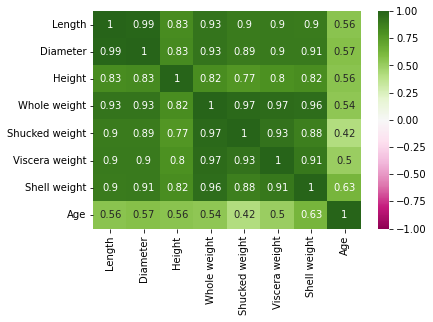

In [7]:
sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)

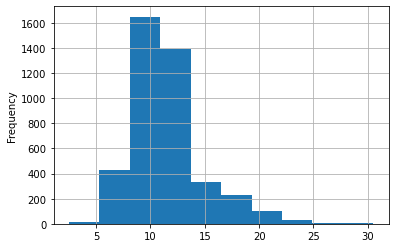

In [8]:
df['Age'].plot.hist(grid=True)

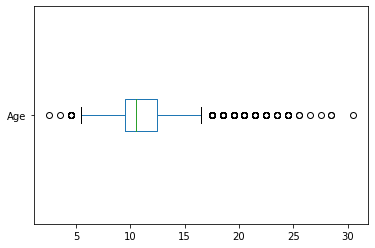

In [9]:
df['Age'].plot.box(vert=False)

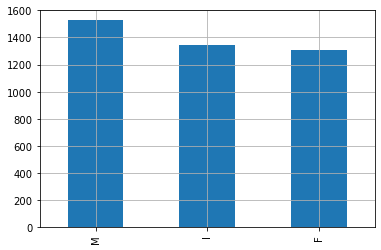

In [10]:
df['Sex'].value_counts().plot.bar(grid=True)

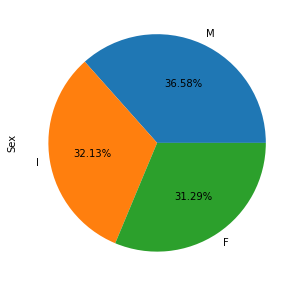

In [11]:
df['Sex'].value_counts().plot.pie(autopct='%.2f%%', figsize=(5, 5))

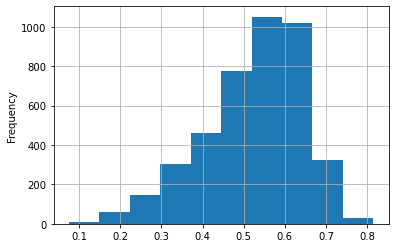

In [12]:
df['Length'].plot.hist(grid=True)
# df['Sex'].plot.hist(grid=True)

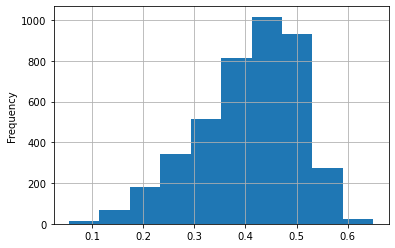

In [13]:
df['Diameter'].plot.hist(grid=True)

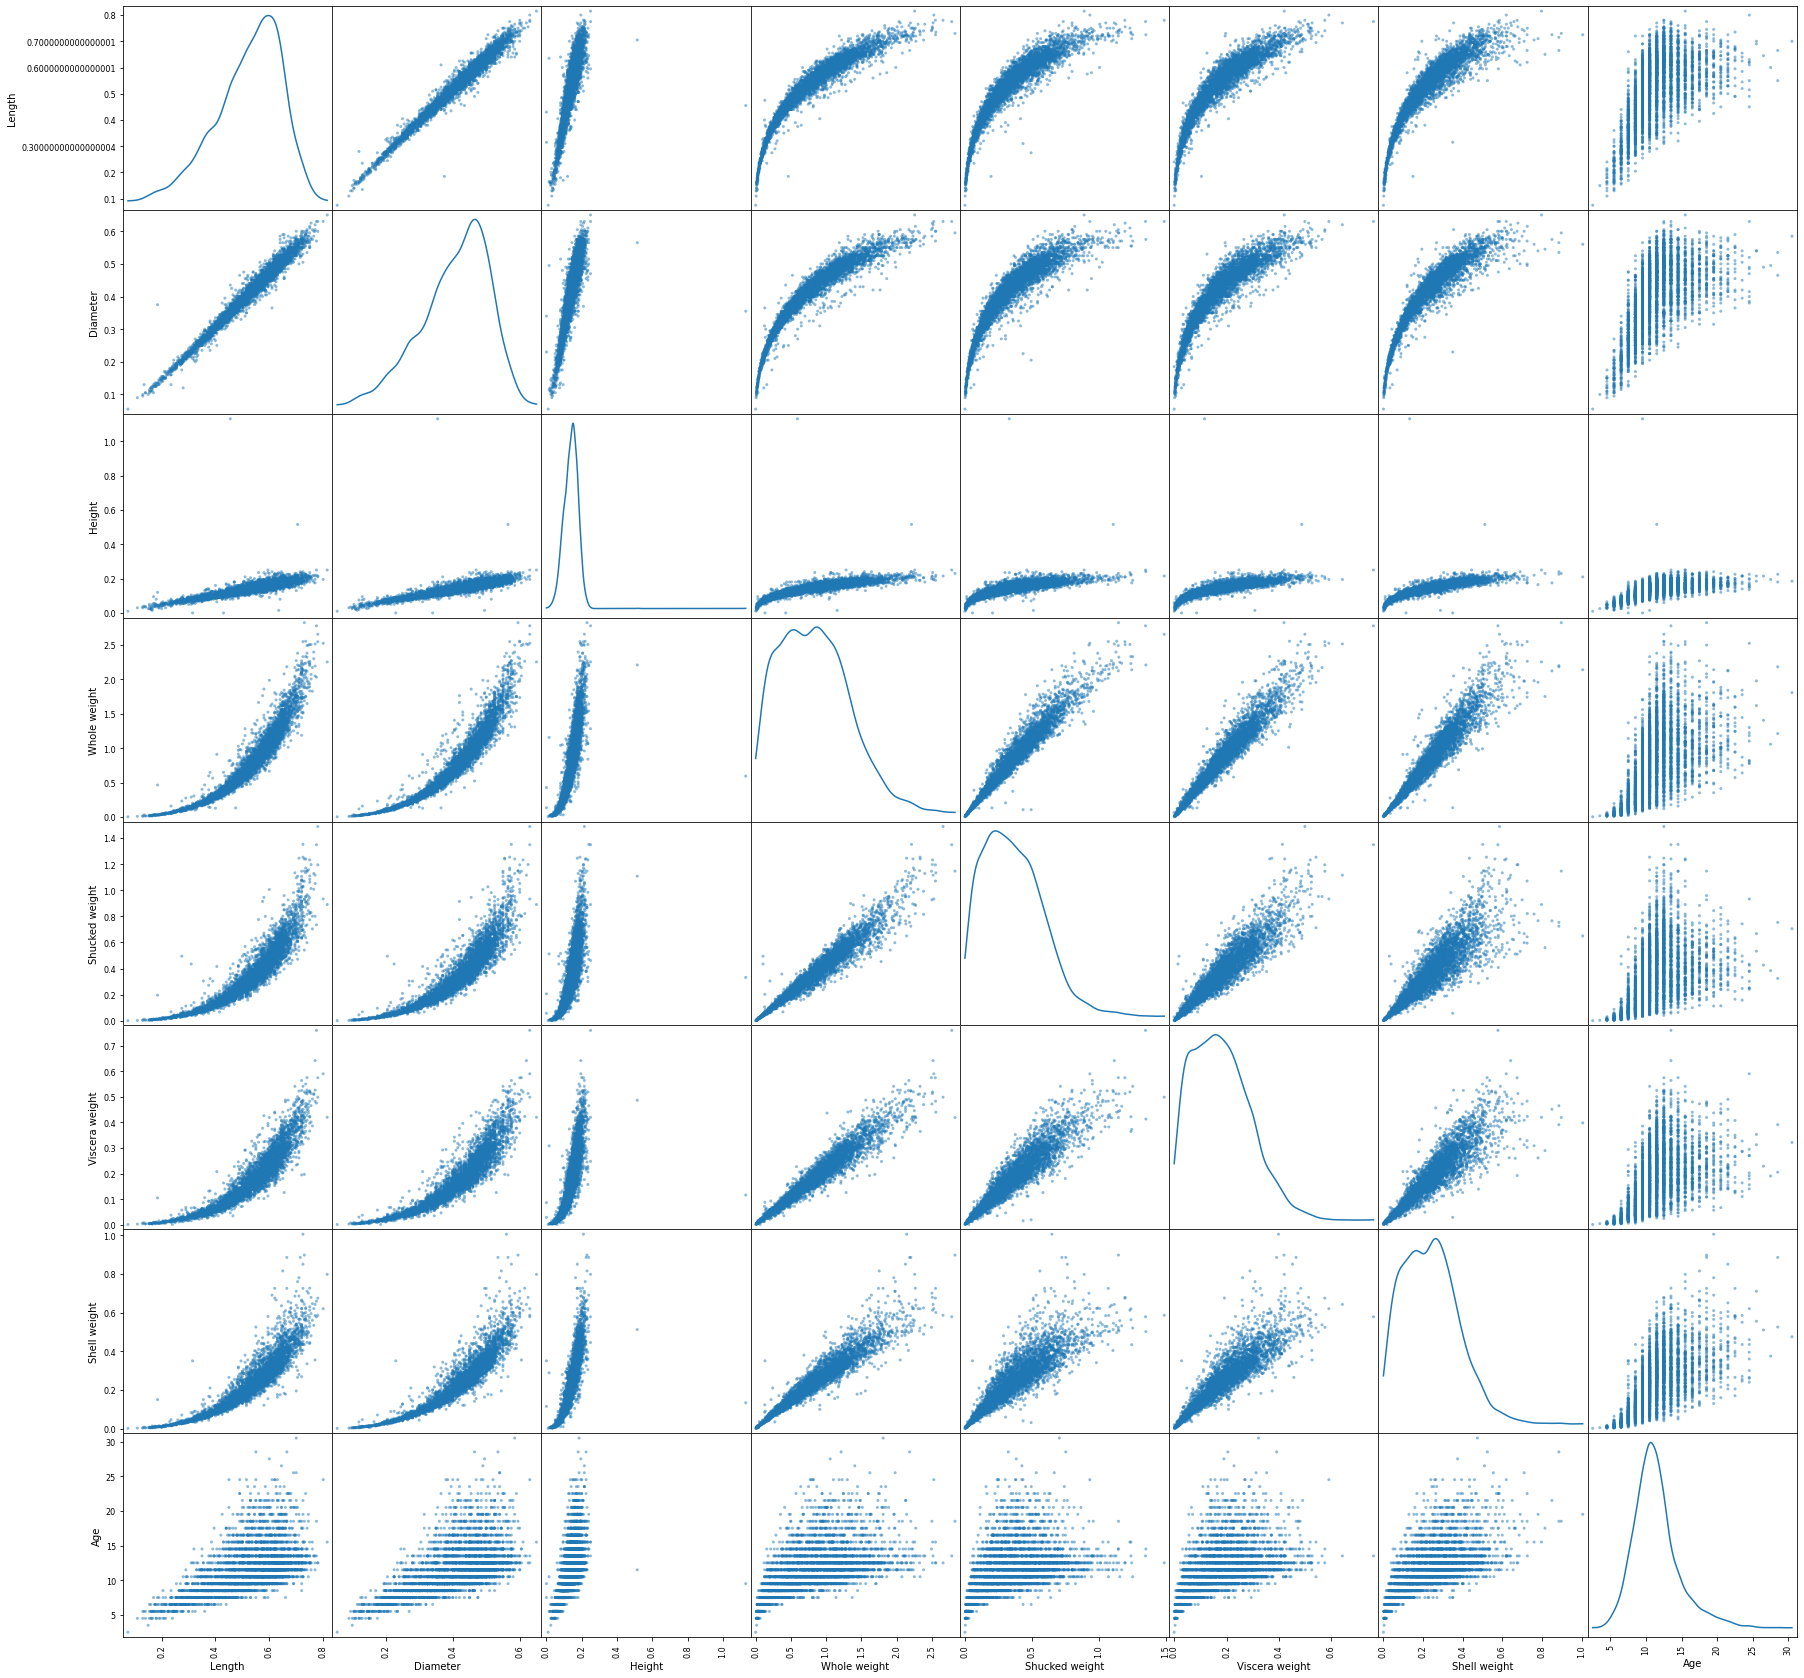

In [14]:
scatter_matrix(df, alpha=0.5, figsize=(30, 30), diagonal='kde')
plt.show()

In [15]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [16]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [17]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


In [18]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [19]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [20]:
np.shape(df)

(4177, 9)

In [21]:
# prepare input and output data

# Split the dataset into train set and test set in which 20 percent of the data will be used for testing.

y = df['Age']
X = df.drop(['Age'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# learned parameters
inputValue = model.coef_
profit = model.intercept_

print('We obtained the model parameters as follows:')
print('input Value: ', inputValue)
print('Age: ', profit)

We obtained the model parameters as follows:
input Value:  [  0.07222858  -1.31597839  13.55068234   9.20700521   9.66281239
 -20.69570857  -9.853576     8.15024148]
Age:  4.49262179917235


In [24]:
y_predicted = model.predict(X_test)


# calculat evaluation measures: mean square error, mean absolute r2-score
mse = metrics.mean_squared_error(y_test, y_predicted)
mae = metrics.mean_absolute_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  5.10418601019335
Mean absolute error:  1.613084193988025
R2 score:  0.5300147524184924


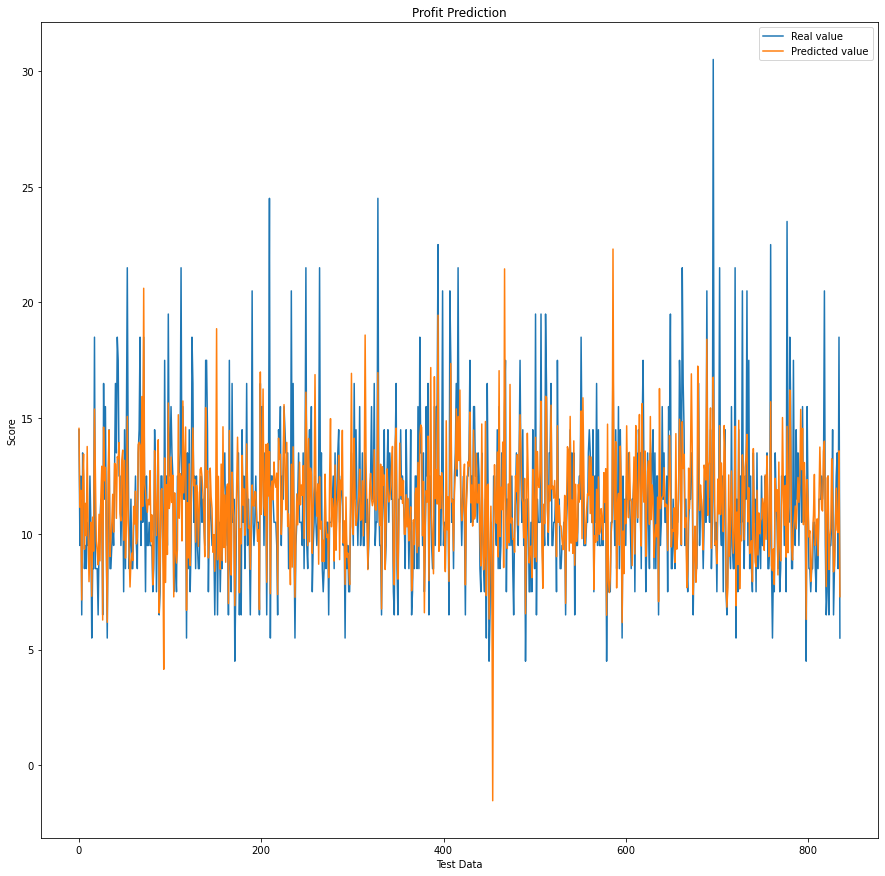

In [25]:
# visualize the predicted value with real value

plt.figure(figsize=(15, 15))

plt.plot(y_test.values, label='Real value')
plt.plot(y_predicted, label='Predicted value')

plt.title('Profit Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()

In [26]:
pd.DataFrame(list(zip(y_predicted, y_test)), columns=['Predicted Age', 'Real Age'])

,Predicted Age,Real Age
0,14.557900,14.5
1,11.150698,9.5
2,11.880072,12.5
3,7.144010,6.5
4,12.208657,13.5
...,...,...
831,11.978477,12.5
832,10.175782,13.5
833,10.059960,8.5
834,13.587536,18.5


In [27]:
# Save cleaned data to csv file
df.to_csv('../datasets/cleaned/abalone.csv', index=False)

In [28]:
# save model to model.pkl
import pickle

with open('../models/model.pkl', 'wb') as file:
    pickle.dump(model, file)